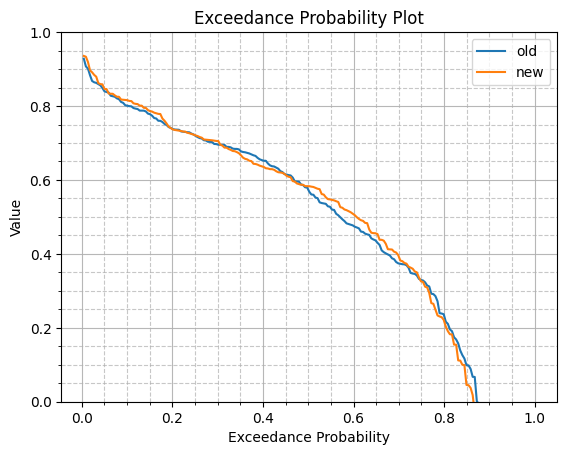

In [70]:
from pathlib import Path
import xarray as xr
from hydroml.evaluation import graphs as g
import matplotlib.pyplot as plt
from tqdm import tqdm

def read_finetuned_simulation(exp_base_path, version, finetune_directory = 'finetune_all', leave=False):
    ds_list = []
    for path in tqdm(list((exp_base_path/version/finetune_directory).glob('*/*/results/simulation.nc')), desc='Reading finetuned simulation', leave=leave):
        ds = xr.open_dataset(path)
        ds_list.append(ds)

    return xr.concat(ds_list, dim='catchment_id')


exp_base_path = Path('P://work//sho108//hydroml//results_2//toos_qc_validation')
versions  = {'old': '241212153049_feb4', 'new': '241213104442_8206'}
for k, version in versions.items():
    resutl_path = exp_base_path / version / 'results'
    ds = xr.open_dataset(resutl_path / 'metrics.nc').isel(lead_time=0, feature=0)
    #ds_ft = xr.open_dataset(resutl_path / 'metrics_finetune_all.nc').isel(lead_time=0, feature=0)
    g.exceedance_curve(ds['nse'])
    #g.exceedance_curve(ds_ft['nse'])

    
plt.ylim(0, 1)
plt.legend(versions.keys())
plt.grid(True, which='major', linestyle='-', alpha=0.9)
plt.grid(True, which='minor', linestyle='--', alpha=0.7)


plt.minorticks_on()

In [74]:
def read_pretrained_simulation(exp_base_path, version, leave=False):
    return xr.open_dataset(exp_base_path / version / 'results' / 'simulation.nc')

ds_ft_old = read_finetuned_simulation(exp_base_path, versions['old'], leave=True)
ds_ft_new = read_finetuned_simulation(exp_base_path, versions['new'], leave=True)
ds_pre_old = read_pretrained_simulation(exp_base_path, versions['old'], leave=True)
ds_pre_new = read_pretrained_simulation(exp_base_path, versions['new'], leave=True)


data_to_plot = {'ft_old': ds_ft_old, 'ft_new': ds_ft_new, 'pre_old': ds_pre_old, 'pre_new': ds_pre_new}




Reading finetuned simulation: 100%|██████████| 15/15 [00:00<00:00, 48.45it/s]


c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\sho108\AppData\

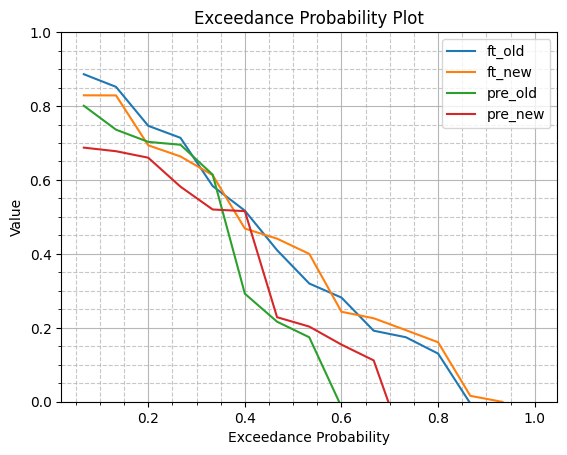

In [76]:
ds = xr.concat(data_to_plot.values(), dim='version')
ds  = ds.assign_coords(version=list(data_to_plot.keys()))

from hydroml.evaluation.metrics import get_metrics
ds_m = get_metrics(ds)
df = ds_m.squeeze().to_dataframe()['nse'].unstack('version').dropna()

for v in df.columns:
    g.exceedance_curve(df[v])
    

plt.legend(df.columns)
plt.ylim(0, 1)
plt.grid(True, which='major', linestyle='-', alpha=0.9)
plt.grid(True, which='minor', linestyle='--', alpha=0.7)
plt.minorticks_on()
